In [12]:
!git clone https://github.com/ufrpe-mineracao-textos/projeto-de-mineracao-20192-traducao-de-texto.git project

fatal: destination path 'project' already exists and is not an empty directory.


In [0]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow 

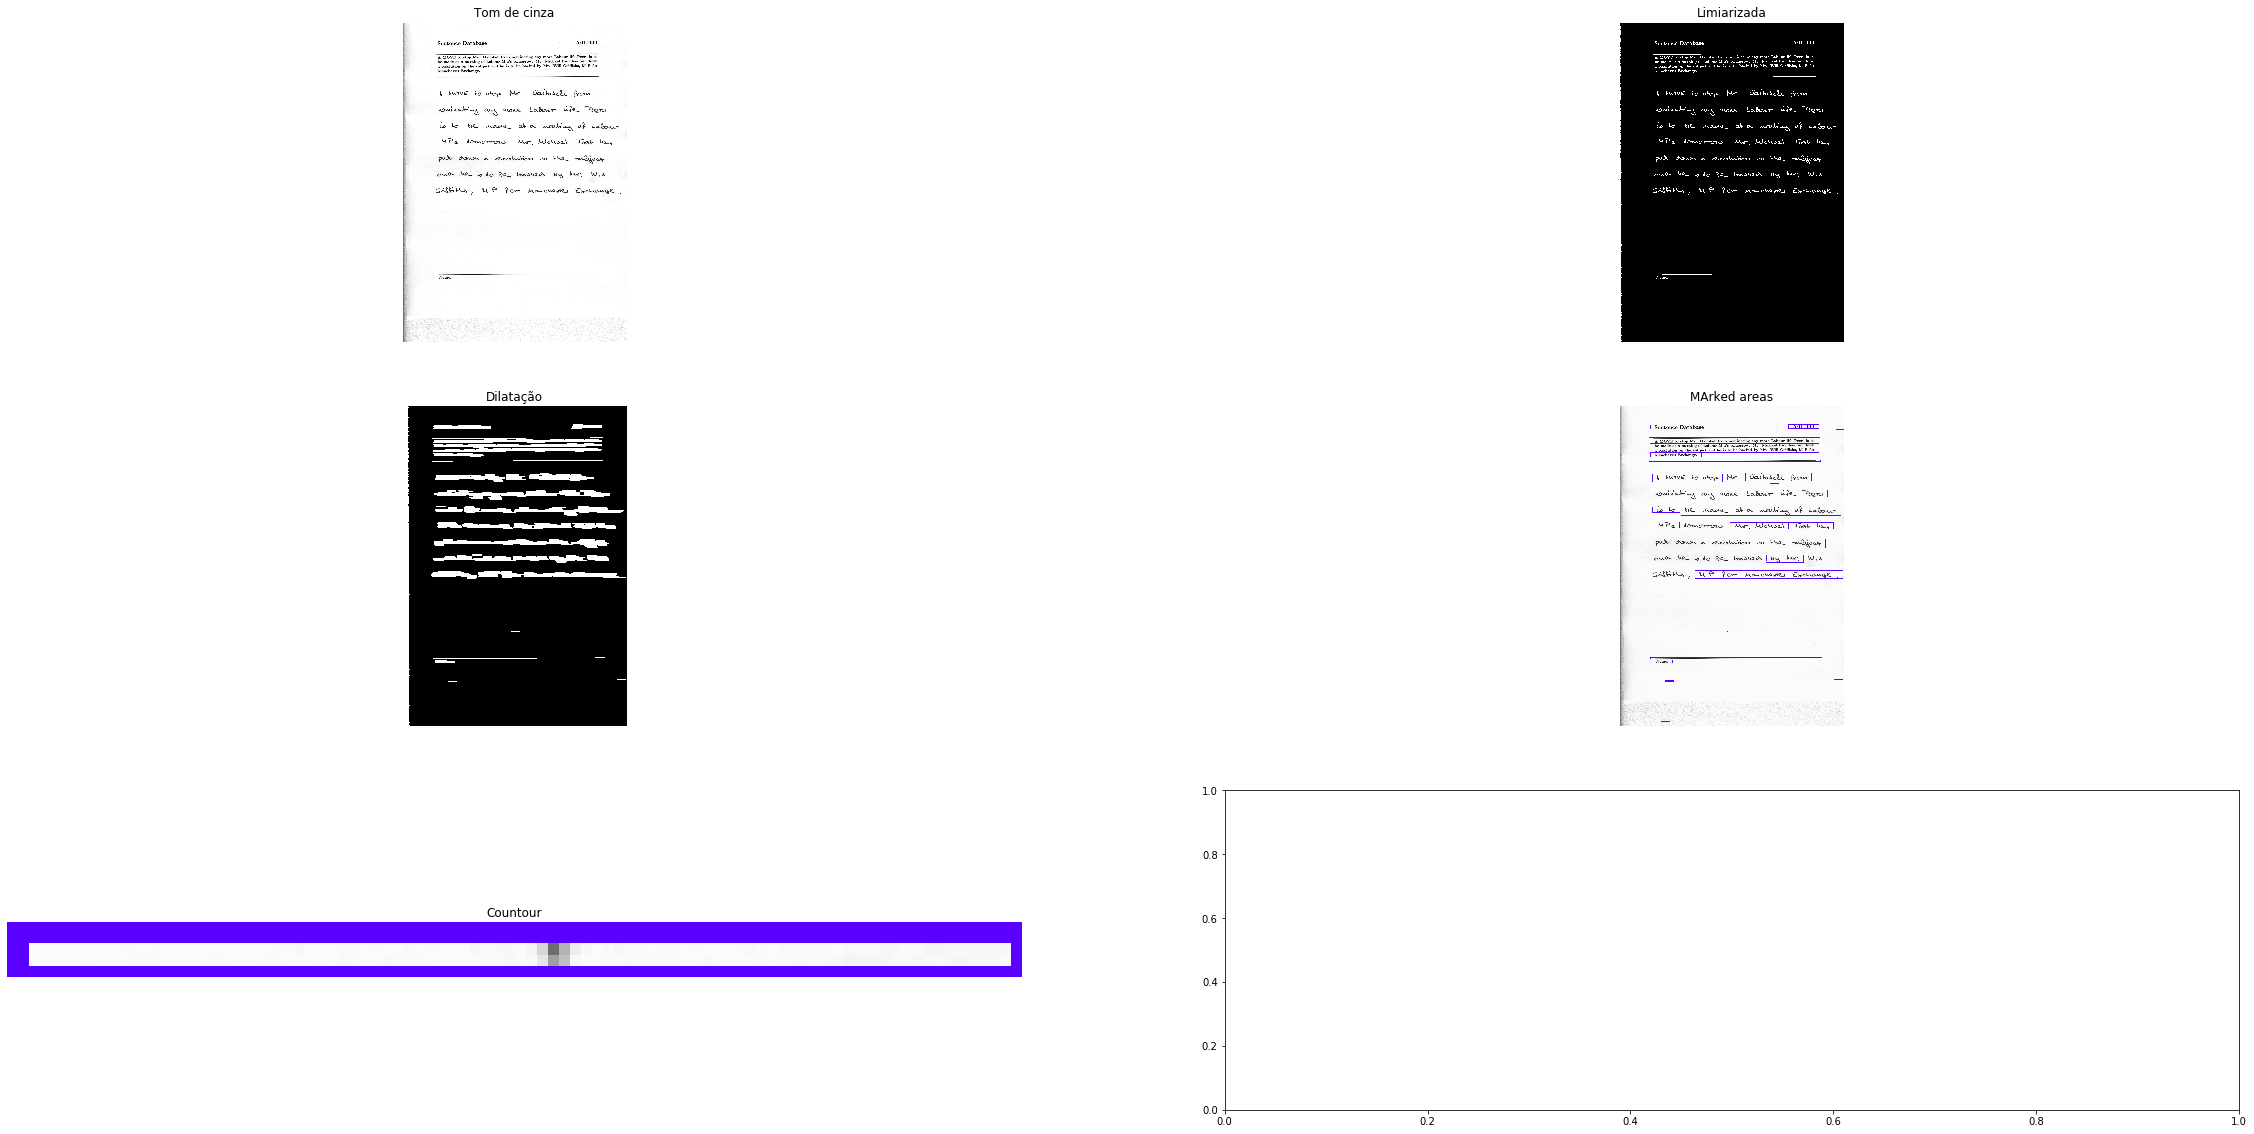

In [14]:
import cv2
import numpy as np
#import image
image = cv2.imread('project/processamento de imagens/test_images/IAM/a01-000u.png')
#cv2.imshow('orig',image)
#cv2.waitKey(0)

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray',gray)
cv2.waitKey(0)

#binary
ret,thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
# cv2.imshow('second',thresh)
cv2.waitKey(0)

#dilation
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
# cv2.imshow('dilated',img_dilation)
cv2.waitKey(0)

#find contours
im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]

    # show ROI
#     cv2.imshow('segment no:'+str(i),roi)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(0)

# cv2.imshow('marked areas',image)
cv2.waitKey(0)


ig, axes = plt.subplots(3, 2, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Tom de cinza')
ax[0].set_axis_off()

ax[1].imshow(thresh, cmap='gray')
ax[1].set_title('Limiarizada')
ax[1].set_axis_off()

ax[2].imshow(img_dilation, cmap='gray')
ax[2].set_title('Dilatação')
ax[2].set_axis_off()

ax[3].imshow(image, cmap='gray')
ax[3].set_title('MArked areas')
ax[3].set_axis_off()

ax[4].imshow(roi, cmap='gray')
ax[4].set_title('Countour')
ax[4].set_axis_off()